In [ ]:
%matplotlib inline
from pylab import *
from sci378.stats import *

Version:  0.0.36


`pip install "git+https://github.com/bblais/sci378" --upgrade`


`pip install pyndamics3 --upgrade`

## Two Samples

In [ ]:
group_a=[161.05, 157.94, 164.18, 163.54, 160.07, 163.46, 
         168.08, 165.58, 164.61, 162.37, 160.85, 159.48, 
         160.31, 161.95, 163.24, 161.4, 162.66, 163.55, 
         160.47, 159.17, 164.71, 161.73, 159.57, 162.96, 158.41]

group_b=[158.51, 155.79, 159.58, 161.68, 155.75, 158.06, 
         159.64, 168.26, 162.87, 156.98, 157.6, 159.35, 
         159.11, 155.99, 155.76, 152.08, 158.77, 155.19, 
         165.59, 156.95, 159.46, 160.89, 158.78, 156.59, 155.98]

In [ ]:
def logprior(μ1,σ1,μ2,σ2):
    value=0
    
    value+=logNormal(μ1,0,100)
    value+=logJeffreys(σ1)
    value+=logNormal(μ2,0,100)
    value+=logJeffreys(σ2)
    
    return value

def loglikelihood(data,μ1,σ1,μ2,σ2):
    x,y=data
    value=0
        
    value+=logNormal(x-μ1,0,σ1)
    value+=logNormal(y-μ2,0,σ2)
    
    return value
    

In [ ]:
model=MCMCModel((group_a,group_b),loglikelihood,logprior,
               μ1=Normal(10,10),    # initial guess for μ1
               σ1=Uniform(0,10),    # initial guess for σ1 (make sure it's positive)
               μ2=Normal(10,10),    # initial guess for μ2
               σ2=Uniform(0,10),    # initial guess for σ2 (make sure it's positive)
               )

Running MCMC 1/3...
Done.
0.75 s
Running MCMC 2/3...
Done.
0.80 s
Running MCMC 3/3...
Done.
0.80 s


<Figure size 1000x800 with 0 Axes>

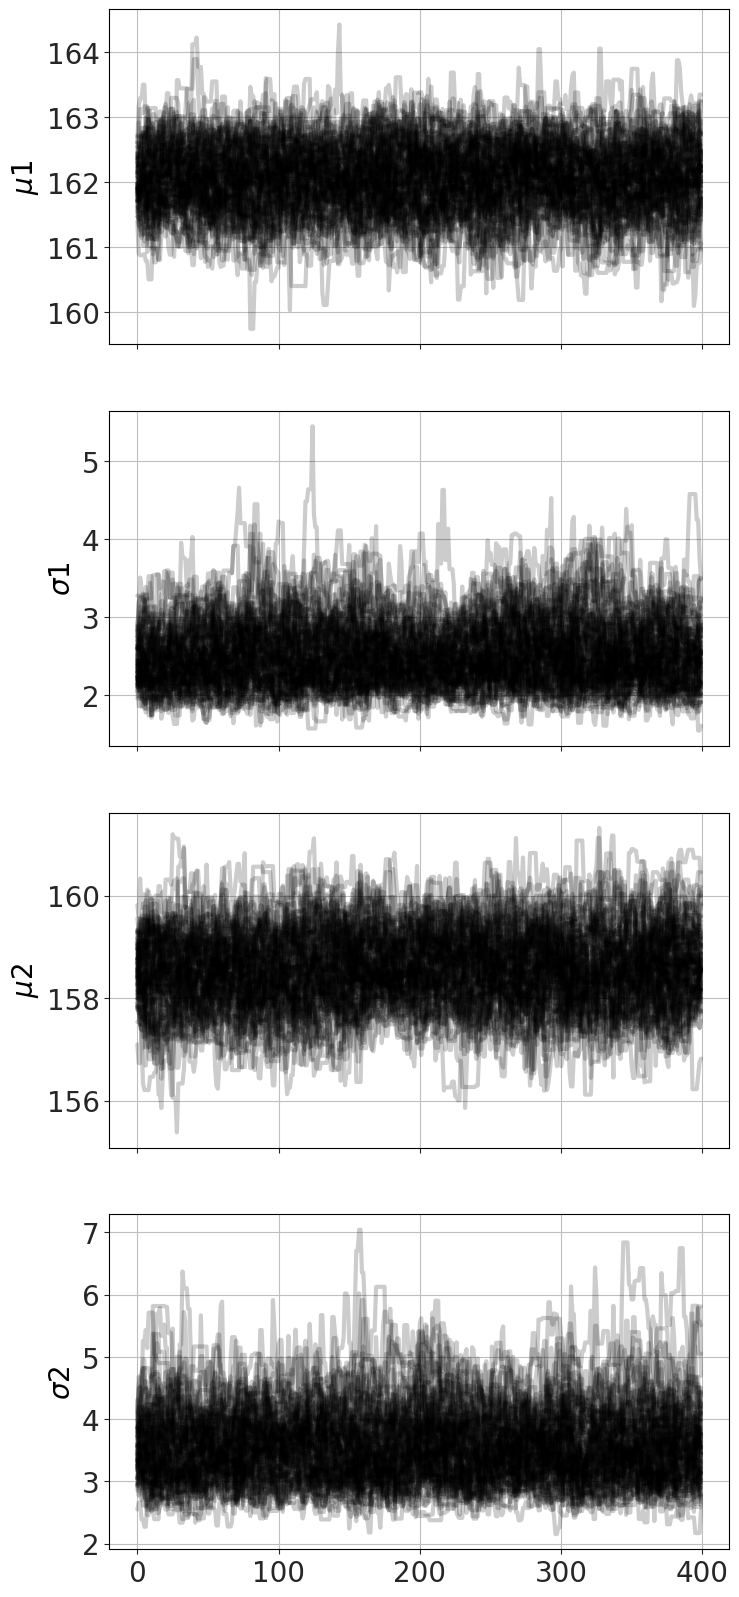

In [ ]:
model.run_mcmc(400,repeat=3,verbose=True)
model.plot_chains()

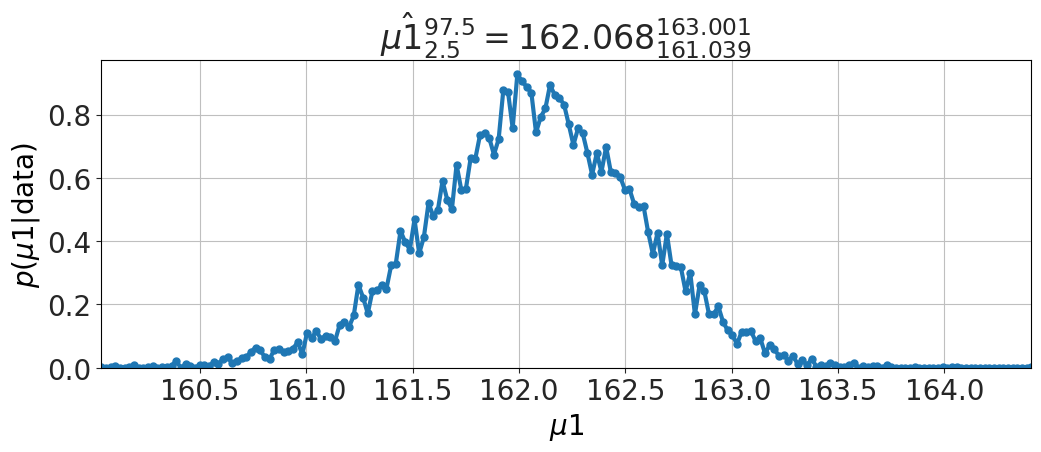

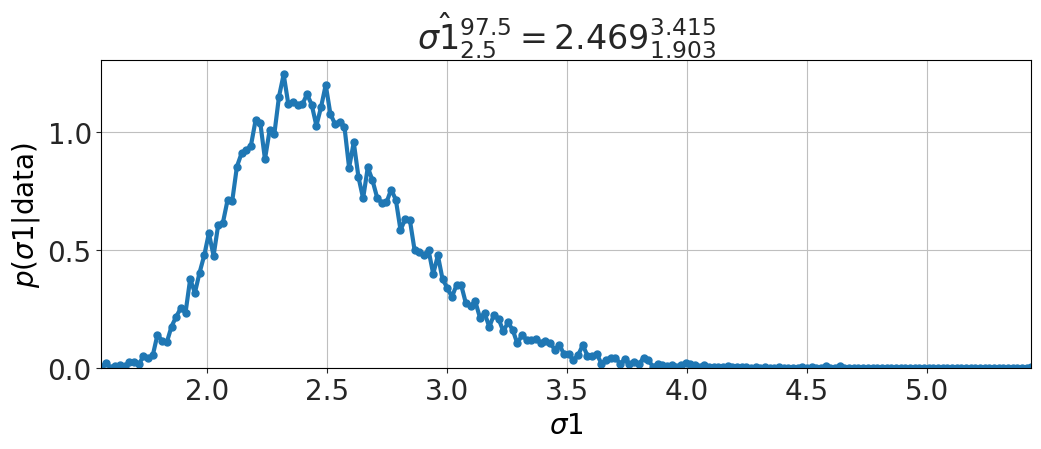

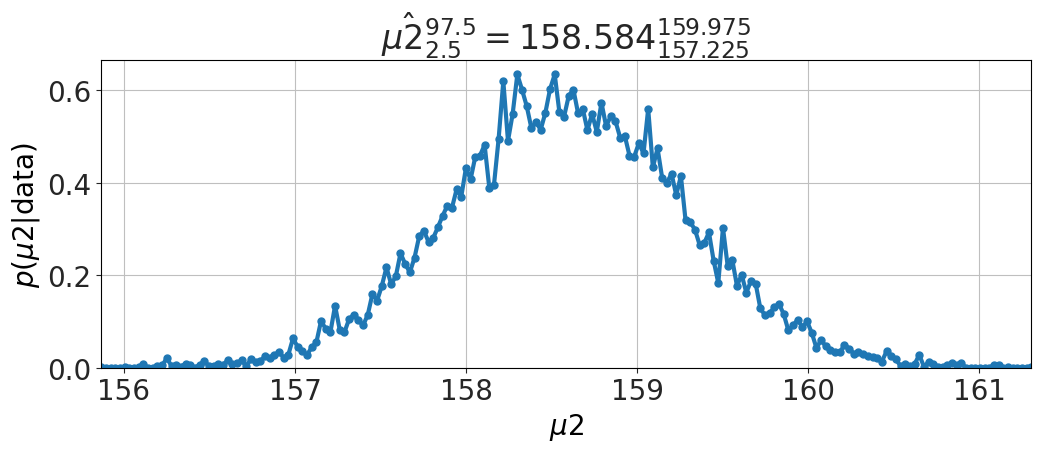

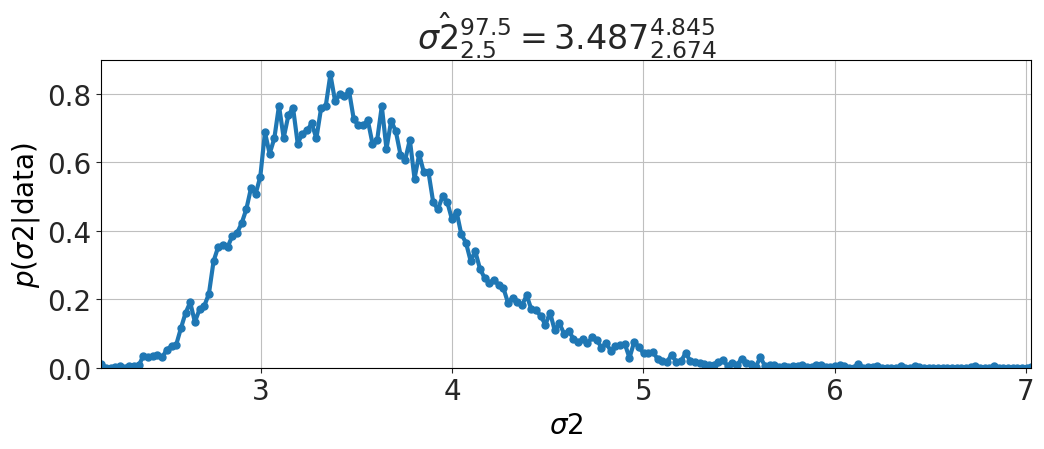

In [ ]:
model.plot_distributions()

In [ ]:
1-model.P('μ1<μ2')  # broken

0.9995666666666667

In [ ]:
model.best_estimates()

{'μ1': array([161.57962475, 162.06754548, 162.54818253]),
 'σ1': array([2.14843923, 2.46890766, 2.88491914]),
 'μ2': array([157.90640135, 158.58361103, 159.26984231]),
 'σ2': array([3.02227334, 3.4867345 , 4.05393759])}